In [1]:
import scipy.stats as scs
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression Problem

This afternoon we will work through a linear regression problem from start to finish. 

You are given a dataset that contains information about 400 individuals' credit card and bank balances.
Your task is to predict an individual's balance based on various variables.
 
### 1. Load the data into a dataframe from `data/balance.csv`. Make a scatter matrix of the variables. Comment on the distribution of your variables and describe the relationships between your numeric feature variables and `Balance`.

In [39]:
raw = pd.read_csv('data/balance.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


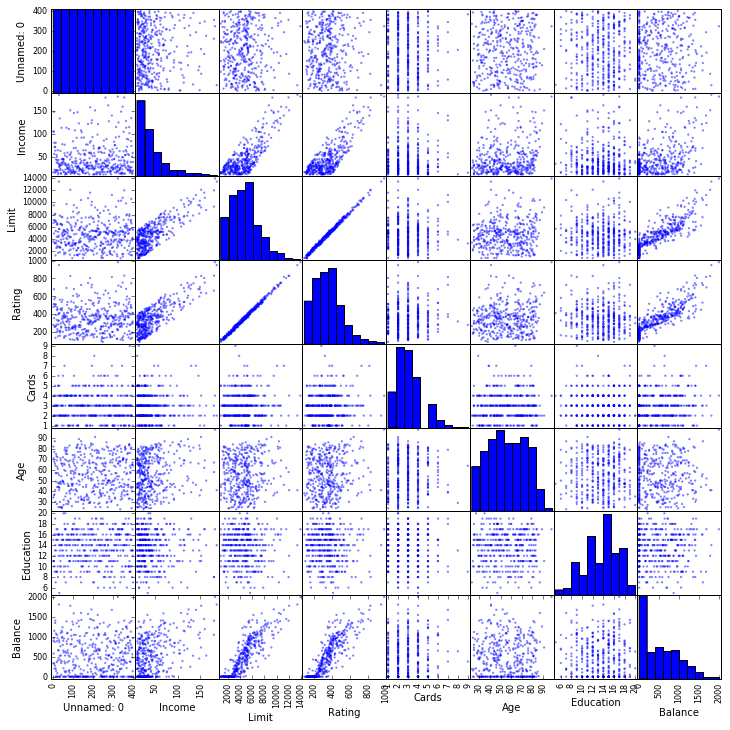

In [8]:
pd.scatter_matrix(df, figsize=(12, 12))
plt.show()

Looking at the graphs, limit is deterimed by rating, limit, and income.

### 2. Since `Gender`, `Married` and `Student` are boolean variables, convert the columns to `1/0`, i.e. the value should be `1` if the response to `Married` is `Yes`, otherwise `0`. 
   

In [65]:
df = raw.copy()
gender = {' Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].apply(lambda x: gender[x])

married = {'Yes': 1, 'No': 0}
df['Married'] = df['Married'].apply(lambda x: married[x])

student = {'Yes': 1, 'No': 0}
df['Student'] = df['Student'].apply(lambda x: student[x])
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


### 3. Since `Ethnicity` is a categorical variable that has more than 2 categories, we need to convert the categories within the variable to separate columns with binary responses. These are known as dummy variables. Use `get_dummies` in pandas to get create dummy variables for `Ethnicity`. After you create the model, drop the `African` dummy variable. It can be any dummy variable you want the rest of the dummies to be compared against. 

In [45]:
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [54]:
# df['Cauc'] = 0

# cauc = {'Caucasian': 1, 'Asian': 0, 'African American':0}
# df['Cauc'] = df['Ethnicity'].apply(lambda x: cauc[x])

# asian = {'Caucasian': 0, 'Asian': 1, 'African American':0}
# df['Asian'] = df['Ethnicity'].apply(lambda x: asian[x])

# del df['Ethnicity']

# df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Cauc,Asian
0,1,14.891,3606,283,2,34,11,1,0,1,333,1,0
1,2,106.025,6645,483,3,82,15,0,1,1,903,0,1
2,3,104.593,7075,514,4,71,11,1,0,0,580,0,1
3,4,148.924,9504,681,3,36,11,0,0,0,964,0,1
4,5,55.882,4897,357,2,68,16,1,0,1,331,1,0


In [66]:
df_ethnicity  = pd.get_dummies(df.Ethnicity)
df = pd.concat([df, df_ethnicity], axis=1)
df =  df.drop(['Ethnicity', 'African American'], axis=1)
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,333,0,1
1,2,106.025,6645,483,3,82,15,0,1,1,903,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,580,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,964,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,331,0,1


### 4. Using all the feature variables, fit a linear regression model to predict `Balance`. Validate the assumptions required of the linear regression model. Make a residual plot by plotting the fitted y values against the studentized residuals. What do you observe?

In [67]:
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [73]:
df['Constant'] = 1


In [75]:
df.head()
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Balance', 'Asian', 'Caucasian',
       'Constant'],
      dtype='object')

In [77]:
model = sm.OLS(df.Balance, df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Asian', 'Caucasian', 'Constant']])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          1.11e-253
Time:                        15:55:04   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -7.8031      0.234    -33.314      0.0

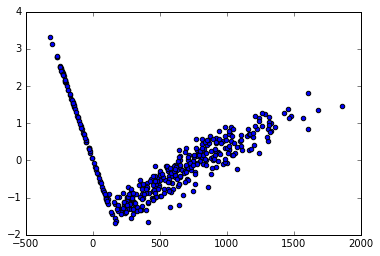

In [81]:
plt.scatter(result.fittedvalues, (result.outlier_test()['student_resid']))
plt.show()

### 5. The residuals should resemble a `v` shape. Try a few other models by excluding some features from the full model. Does the residual plot change?

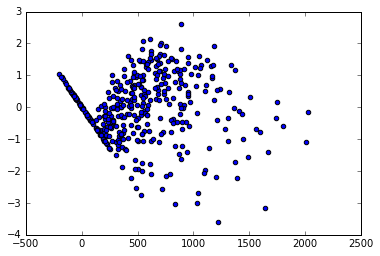

In [87]:
def plot_residuals(columns):
    model = sm.OLS(df.Balance, df[columns])
    result = model.fit()
    plt.scatter(result.fittedvalues, (result.outlier_test()['student_resid']))
    plt.show()


# columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
#        'Gender', 'Student', 'Married', 'Asian', 'Caucasian', 'Constant']

columns = ['Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Asian', 'Caucasian', 'Constant']

# keep rating, get rid of anyhting thats highly correlated with it
plot_residuals(columns)

###   You should find that various `Balance` values are fitted around the `0` point. It would seem that the abundance of observations at `0` balance is affecting how the model is fit to the data. Plot the histogram for `Balance` again, except set `bins=100`. What do you observe?


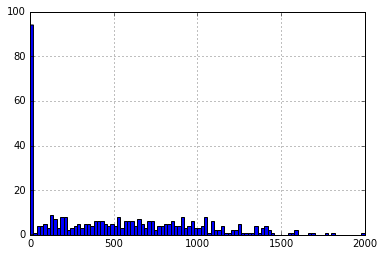

In [89]:
df.Balance.hist(bins = 100)

# shit ton of 0 balances

### 6. In this scenario, the abundance of observations loaded at `0` are affecting the fit.  One option would be to fit more than one model.  In this case, our first "model" will predict 0 or non-zero balance based on just one feature. Later on we will look into more sophisticated models.  
    
   Re-plot the univariate scatter plot on a bigger figure size. Look for variable(s) that can differentiate most zero balance observation from non-zero balance observations. Use the provided pandas code as a reference.
   
   ```python
   df.plot(kind='scatter', y='Balance', x='Limit', edgecolor='none', figsize=(12, 5))
   ```

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


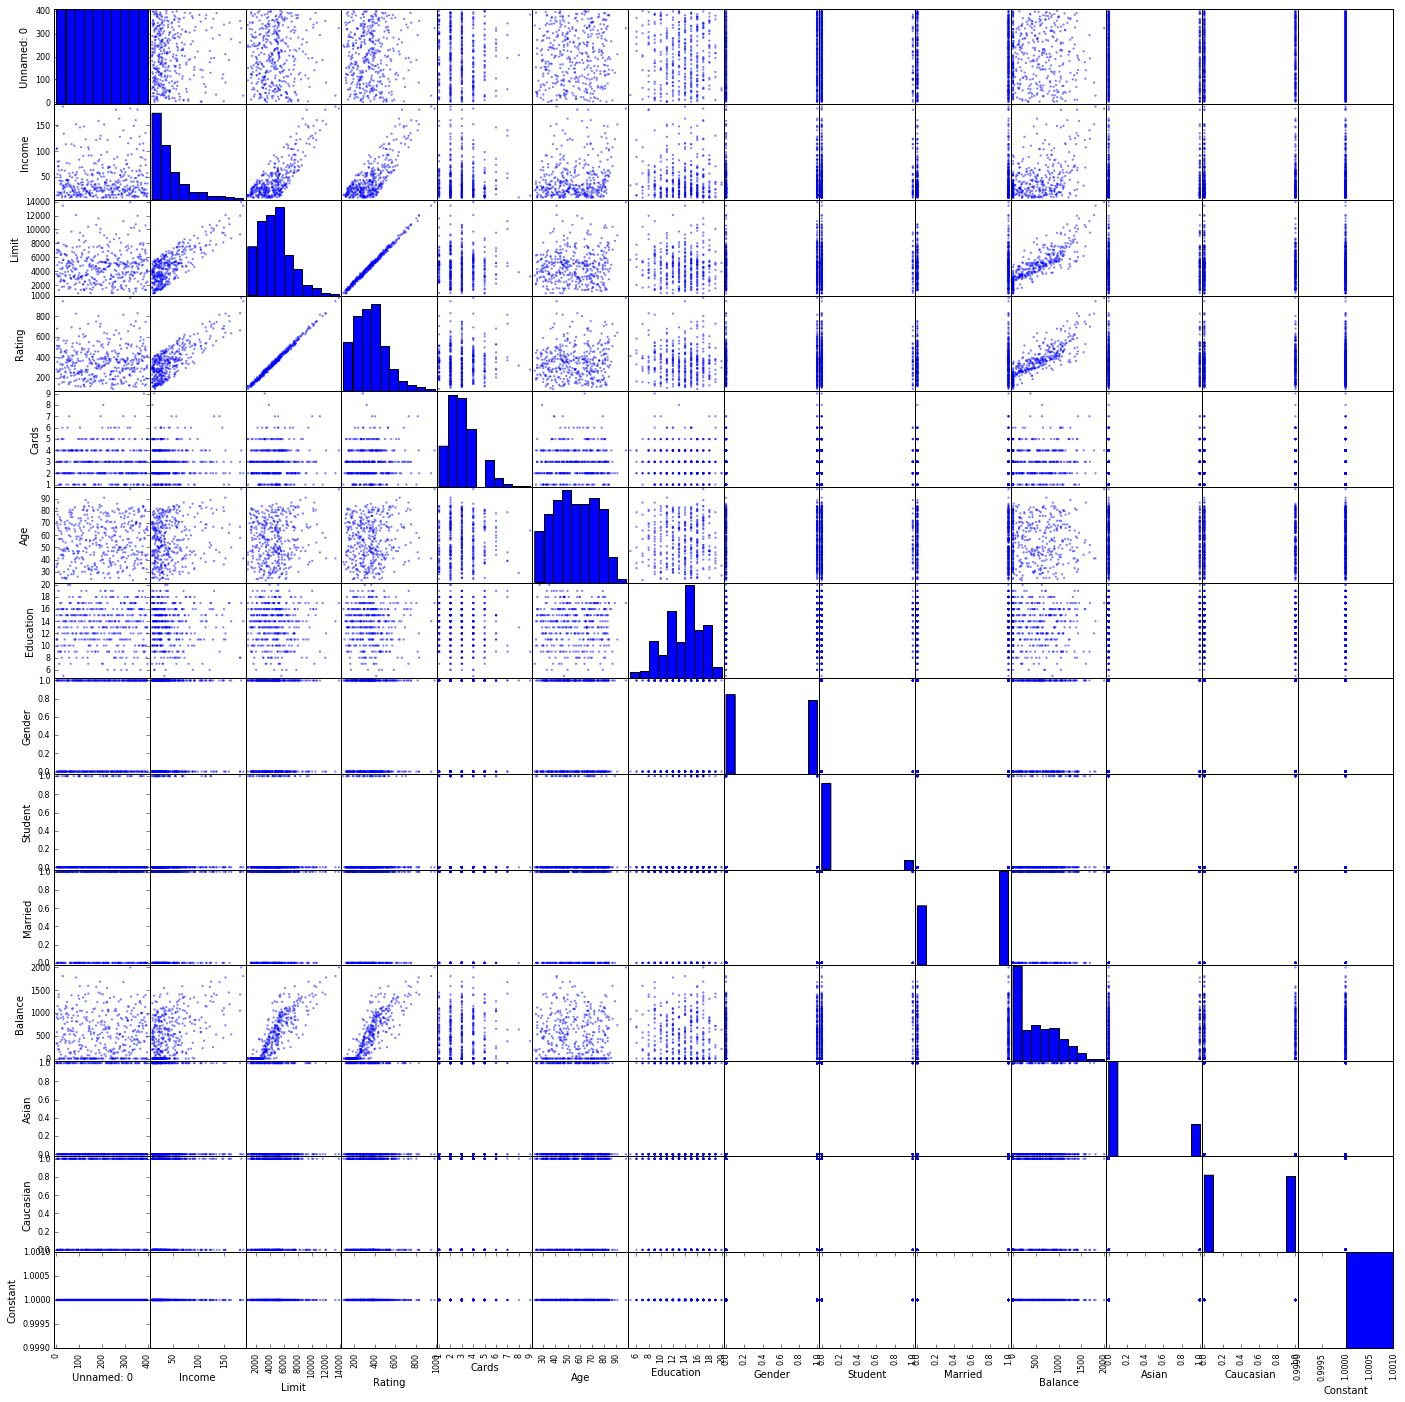

In [93]:
pd.scatter_matrix(df, figsize=(24, 24))
plt.show()

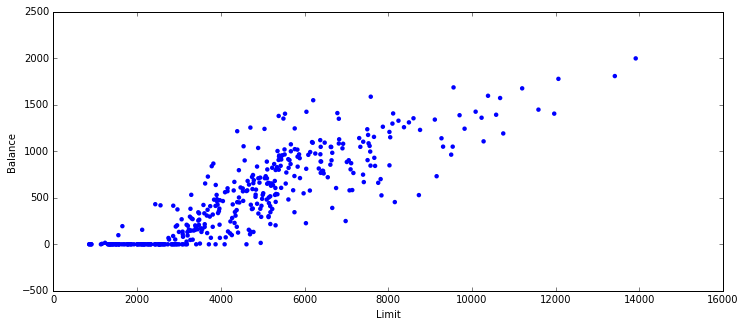

In [94]:
df.plot(kind='scatter', y='Balance', x='Limit', edgecolor='none', figsize=(12, 5))

### 7. Once you find the relevant variable(s), decide on a threshold that would give you reasonable separation between the zero and non-zero observations, i.e. minimize false positive and false negative predictions. You can do it visually based on your plot now, but a slightly more sophisticated way to model this would be with a   [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) which we will cover later in the course.  

### 8. Remove the data points below the decided threshold of your chosen variable and examine the number of zero observations that remain.  

   This is an atypical first step for linear regression but works well in this situation because we have a large loading of `0` observations in our response, which are affecting the regression fit.  In essence, we are fitting two models, one feeding into the other.  The first model simply predicts `0` or non-zero balance based on a single feature, the second model predicts the balance given that the first model predicted non-zero balance.  
   

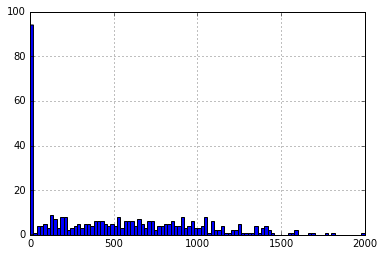

In [95]:
df.Balance.hist(bins = 100)


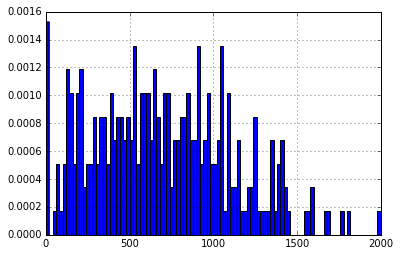

In [107]:
df[(df.Rating > 250) & (df.Limit > 3000)].Balance.hist(bins = 100, normed = True)

### 9. Now re-fit the same model and examine the residuals. It might still be skewed, but should resemble more of a normal distribution.  While it's important to strive for models that pass the model diagnostic tests, in practice we sometimes loosen the restrictions a bit.  

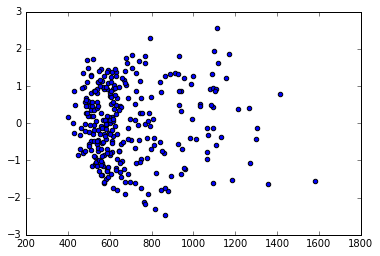

In [111]:
def plot_residuals(df, columns):
    model = sm.OLS(df.Balance, df[columns])
    result = model.fit()
    plt.scatter(result.fittedvalues, (result.outlier_test()['student_resid']))
    plt.show()

# ALL COLUMNS:
# columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
#        'Gender', 'Student', 'Married', 'Asian', 'Caucasian', 'Constant']

new_df = df[(df.Rating > 250) & (df.Limit > 3000)]
columns = ['Income', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Asian', 'Caucasian', 'Constant']

# keep rating, get rid of anyhting thats highly correlated with it
plot_residuals(new_df, columns)

### 10. Try out a few different models using different sets of features.  

This can be a bit of an art, but some guidelines you can use are to 
- (i) exclude features which don't have statistically significant beta coefficients and 
- (ii) exclude features with high variance inflation factor or high collinearity with another feature already in the model.  

To decide among the models, you can use adjusted R^2 or F-tests.  Tomorrow we'll get into a more general model-evaluation technique called cross-validation.  
 

In [118]:
columns = ['Income', #'Cards', #'Age', #'Education',
       #'Gender', 
           'Student', 
           #'Married', 'Asian', 'Caucasian', 
           'Constant']
model = sm.OLS(new_df.Balance, new_df[columns])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     45.80
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           5.01e-18
Time:                        16:28:32   Log-Likelihood:                -2153.9
No. Observations:                 295   AIC:                             4314.
Df Residuals:                     292   BIC:                             4325.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income         3.6936      0.551      6.701      0.0

## Extra Credit

**Interactions, Polynomials, Transformations, etc.**

11. Fit a linear model to predict `Balance` using `Income` as a predictor.  Fit a second model using `Income` and `Student` 
   as predictors.  Finally fit a model using `Income`, `Student`, and `Income`*`Student` to account for a possible interaction    effect between Income and Student.  How do the models compare?  Is the interaction term significant?  

 

In [122]:
new_df['IncomeStudent'] = new_df.Income*new_df.Student
columns = ['Income', 'Student', 'IncomeStudent', 'Constant']
model = sm.OLS(new_df.Balance, new_df[columns])
result = model.fit()
print(result.summary())

print("Interaction term is not super helpful. Increases R-squared by just a smidge, about 4%)")

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     32.30
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           4.76e-18
Time:                        16:34:57   Log-Likelihood:                -2151.7
No. Observations:                 295   AIC:                             4311.
Df Residuals:                     291   BIC:                             4326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Income            4.1037      0.583      7.039

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


  If the interaction term is significant, make a single plot with two regression lines, one for Student and one for non-Students.  You should have `Balance` on the y-axis, `Income` on the x-axis, and `Student` or non-`Student` coded in using two different colors (add a legend). 

   Since the models are nested such that each model has one more predictor than the previous, you can simply look at the p-values to make some comparisons.  This is in essence a t-test, which is equivalent to performing an F-test.  



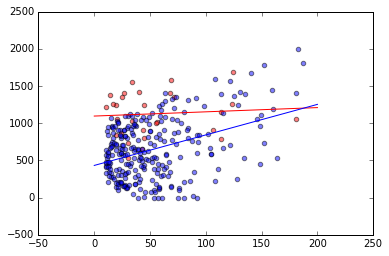

In [155]:
student = new_df[new_df.Student == 1]
non_student = new_df[new_df.Student == 0]


plt.scatter(student['Income'], student['Balance'], c='r', alpha = .5)
plt.scatter(non_student['Income'], non_student['Balance'], alpha = .5)

x_plot = np.linspace(0, 200, 200)

model_1 = sm.OLS(student.Balance, student[['Income', 'Constant']])
model_2 = sm.OLS(non_student.Balance, non_student[['Income', 'Constant']])

results_1 = model_1.fit()
results_2 = model_2.fit()

plt.plot(x_plot, x_plot*results_1.params[0] + results_1.params[1], c='r')
plt.plot(x_plot, x_plot*results_2.params[0] + results_2.params[1], c='b')

   
11. Return to your final model in  `10.`  Can you improve upon this fit by making transformations to your selected features?  

   Generally, there is no defined end to the modeling process so this step can take as long as you would like.  At some point    you just have to stop!  